In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [3]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [4]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=32630e5cfe13c73fe86094f397777ada


In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

608

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | tynda
Processing Record 2 of Set 13 | atuona
Processing Record 3 of Set 13 | lewistown
Processing Record 4 of Set 13 | kieta
Processing Record 5 of Set 13 | beloha
Processing Record 6 of Set 13 | dharchula
Processing Record 7 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 8 of Set 13 | jamestown
Processing Record 9 of Set 13 | punta arenas
Processing Record 10 of Set 13 | sofiysk
City not found. Skipping...
Processing Record 11 of Set 13 | san cristobal
Processing Record 12 of Set 13 | mar del plata
Processing Record 13 of Set 13 | kaitangata
Processing Record 14 of Set 13 | busselton
Processing Record 15 of Set 13 | torbay
Processing Record 16 of Set 13 | mareeba
Processing Record 17 of Set 13 | mataura
Processing Record 18 of Set 13 | hamilton
Processing Record 19 of Set 13 | kalmunai
Processing Record 20 of Set 13 | kahului
Processing Record 21 of Set 13 | barrow
Processi

Processing Record 35 of Set 16 | tyubuk
Processing Record 36 of Set 16 | qaanaaq
Processing Record 37 of Set 16 | khani
Processing Record 38 of Set 16 | shubarshi
Processing Record 39 of Set 16 | yarega
Processing Record 40 of Set 16 | saskylakh
Processing Record 41 of Set 16 | khormuj
City not found. Skipping...
Processing Record 42 of Set 16 | pitimbu
Processing Record 43 of Set 16 | faya
Processing Record 44 of Set 16 | mys shmidta
City not found. Skipping...
Processing Record 45 of Set 16 | nouadhibou
Processing Record 46 of Set 16 | ialibu
Processing Record 47 of Set 16 | samusu
City not found. Skipping...
Processing Record 48 of Set 16 | warri
Processing Record 49 of Set 16 | sorvag
City not found. Skipping...
Processing Record 50 of Set 16 | mount hagen
Processing Record 1 of Set 17 | atherton
Processing Record 2 of Set 17 | srednekolymsk
Processing Record 3 of Set 17 | paraisopolis
Processing Record 4 of Set 17 | sinop
Processing Record 5 of Set 17 | villacarrillo
Processing Re

Processing Record 21 of Set 20 | changli
Processing Record 22 of Set 20 | hay river
Processing Record 23 of Set 20 | trairi
Processing Record 24 of Set 20 | sompeta
Processing Record 25 of Set 20 | trento
Processing Record 26 of Set 20 | novyy yegorlyk
Processing Record 27 of Set 20 | gilbues
Processing Record 28 of Set 20 | grindavik
Processing Record 29 of Set 20 | luderitz
Processing Record 30 of Set 20 | bilibino
Processing Record 31 of Set 20 | sao francisco de assis
Processing Record 32 of Set 20 | ghatanji
Processing Record 33 of Set 20 | voi
Processing Record 34 of Set 20 | maceio
Processing Record 35 of Set 20 | genc
Processing Record 36 of Set 20 | salinopolis
Processing Record 37 of Set 20 | rondonopolis
Processing Record 38 of Set 20 | kuytun
Processing Record 39 of Set 20 | ardesen
Processing Record 40 of Set 20 | matagami
Processing Record 41 of Set 20 | koutsouras
Processing Record 42 of Set 20 | kavaratti
Processing Record 43 of Set 20 | passos
Processing Record 44 of S

Processing Record 8 of Set 24 | mantua
Processing Record 9 of Set 24 | addis abeba
Processing Record 10 of Set 24 | bernau
Processing Record 11 of Set 24 | pokhvistnevo
Processing Record 12 of Set 24 | alekseyevsk
Processing Record 13 of Set 24 | buariki
City not found. Skipping...
Processing Record 14 of Set 24 | chimbote
Processing Record 15 of Set 24 | sataua
City not found. Skipping...
Processing Record 16 of Set 24 | karlstad
Processing Record 17 of Set 24 | estacion coahuila
Processing Record 18 of Set 24 | lakatoro
Processing Record 19 of Set 24 | karaul
City not found. Skipping...
Processing Record 20 of Set 24 | moron
Processing Record 21 of Set 24 | novyy nekouz
Processing Record 22 of Set 24 | tamandare
Processing Record 23 of Set 24 | ust-maya
Processing Record 24 of Set 24 | sao geraldo do araguaia
Processing Record 25 of Set 24 | muroto
Processing Record 26 of Set 24 | ensley
Processing Record 27 of Set 24 | ormara
Processing Record 28 of Set 24 | port hardy
Processing Re

In [9]:
len(cities)

608

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tynda,55.1667,124.7167,51.69,99,100,2.19,RU,2021-08-01 21:01:25
1,Atuona,-9.8000,-139.0333,77.14,69,32,11.86,PF,2021-08-01 20:58:44
2,Lewistown,40.5992,-77.5714,82.47,47,1,5.75,US,2021-08-01 21:01:26
3,Kieta,-6.2167,155.6333,78.85,83,10,2.64,PG,2021-08-01 21:00:29
4,Beloha,-25.1667,45.0500,67.19,59,0,9.22,MG,2021-08-01 20:59:04
5,Dharchula,29.8500,80.5333,72.77,89,98,1.70,IN,2021-08-01 21:01:27
6,Jamestown,42.0970,-79.2353,71.29,70,75,4.00,US,2021-08-01 21:01:27
7,Punta Arenas,-53.1500,-70.9167,46.51,66,40,11.50,CL,2021-08-01 20:56:34
8,San Cristobal,7.7669,-72.2250,84.38,80,68,7.29,VE,2021-08-01 20:58:11
9,Mar Del Plata,-38.0023,-57.5575,47.08,30,90,1.99,AR,2021-08-01 21:00:41


In [11]:
# Reordering columns to city, country, date, lat, lng, max temp, humidity, cloudiness, wind speed.
new_column_order =["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

# Printing new order
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tynda,RU,2021-08-01 21:01:25,55.1667,124.7167,51.69,99,100,2.19
1,Atuona,PF,2021-08-01 20:58:44,-9.8000,-139.0333,77.14,69,32,11.86
2,Lewistown,US,2021-08-01 21:01:26,40.5992,-77.5714,82.47,47,1,5.75
3,Kieta,PG,2021-08-01 21:00:29,-6.2167,155.6333,78.85,83,10,2.64
4,Beloha,MG,2021-08-01 20:59:04,-25.1667,45.0500,67.19,59,0,9.22
...,...,...,...,...,...,...,...,...,...
555,Kangalassy,RU,2021-08-01 21:04:27,62.3464,129.9628,58.93,49,67,4.38
556,Saint Anthony,US,2021-08-01 21:04:27,45.0205,-93.2180,80.49,38,90,3.00
557,Dandeli,IN,2021-08-01 21:04:27,15.2667,74.6167,71.35,92,92,7.76
558,Kencong,ID,2021-08-01 21:04:28,-8.2833,113.3667,72.86,90,28,1.92


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

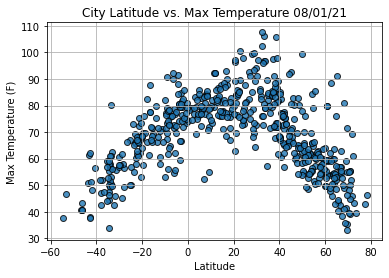

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

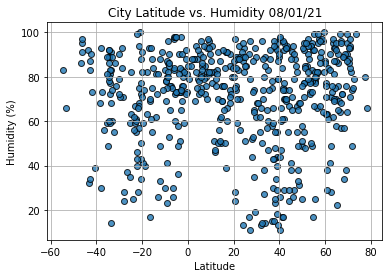

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

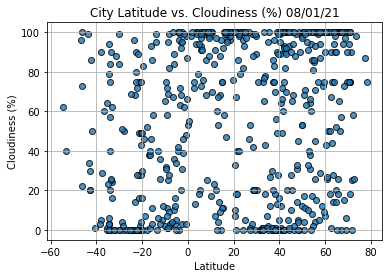

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

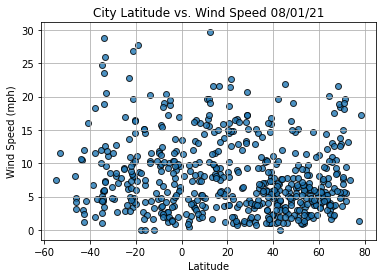

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()